In [ ]:
# In the CBOW model, the distributed representations of context (or surrounding words) are combined to predict the word in the middle

In [ ]:
# https://thinkinfi.com/continuous-bag-of-words-cbow-single-word-model-how-it-works/

# 1. Data Preparation:
# Let’s say we have a text like below:
 
# “i like natural language processing”
 
# To make it simple I have chosen a sentence without capitalization and punctuation. Also I will not remove any stop words (“and”, “the” etc.) but for real world implementation you should do lots of cleaning task like stop word removal, replacing digits, remove punctuation etc.
 
# After pre-processing we will convert the text to list of tokenized word.
 
# [“i”, “like”, “natural”, “language”, “processing”]

In [ ]:
# 2. Generate training data:
# Unique vocabulary: Find unique vocabulary list. As we don’t have any duplicate word in our example text, so unique vocabulary will be:
 
# [“i”, “like”, “natural”, “language”, “processing”]
 
# Now to prepare training data for single word CBOW model, we define “target word” as the word which follows a given word in the text (which will be our “context word”). That means we will be predicting next word for a given word.
 
# Now let’s construct our training examples, scanning through the text with a window will prepare a context word and a target word, like so:



# For example, for context word “i” the target word will be “like”. For our example text full training data will looks like:

# One-hot encoding: We need to convert text to one-hot encoding as algorithm can only understand numeric values.
 
# For example encoded value of the word “i”, which appears first in the vocabulary, will be as the vector [1, 0, 0, 0, 0]. The word “like”, which appears second in the vocabulary, will be encoded as the vector [0, 1, 0, 0, 0]
 


 

# So let’s see overall set of context-target words in one hot encoded form
 

 
# So as you can see above table is our final training data, where encoded target word is Y variablefor our model and encoded context word is X variable for our model.
 
# Now we will move on to train our model.


In [ ]:
# 3. Training Model:
 

# So far, so good right? Now we need to pass this data into the basic neural network with one hidden layer and train it. Only one thing to note is that the desire vector dimension of any word will be the number of hidden nodes.
 
# For this tutorial and demo purpose my desired vector dimension is 3. For example:
 
# “i” => [0.001, 0.896, 0.763]  so number of hidden layer node will be 3.
 
# Dimension (n): It is dimension of word embedding you can treat embedding as number of features or entity like organization, name, gender etc. It can be 10, 20, 100 etc. Increasing number of embedding layer will explain a word or token more deeply. Just for an example Google pre-trained word2vec have dimension of 300.
 
# Now as you know a basic neural network training is divided into some steps:
# 1. Create model Architecture
# 2. Forward Propagation
# 3. Error Calculation
# 4. Weight tuning using backward pass
# Before going into forward propagation we need to understand model architecture in vectorized form.
 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
import numpy as np
# %matplotlib inline

import re

In [2]:
sentences = """we are about to study"""
# the idea of a computational process.
#  Computational processes are abstract beings that inhabit computers.
#  As they evolve, processes manipulate other abstract things called data.
#  The evolution of a process is directed by a pattern of rules
#  called a program. People create programs to direct processes. In effect,
#  we conjure the spirits of the computer with our spells."""

In [3]:
# remove special characters
# sentences = re.sub('[^A-Za-z0-9]+', ' ', sentences)

# remove 1 letter words
# sentences = re.sub(r'(?:^| )\w(?:$| )', ' ', sentences).strip()

# lower all characters
# sentences = sentences.lower()

In [4]:
sentences

'we are about to study'

In [5]:
#vocabulary

words = sentences.split()
vocab = set(words)

In [6]:
vocab_size = len(vocab)
embed_dim = 10
context_size = 2

In [7]:
#Impleentation

word_to_ix = {word: i for i, word in enumerate(vocab)}
ix_to_word = {i: word for i, word in enumerate(vocab)}

In [8]:
# data - [(context), target]

data = []
for i in range(2, len(words) - 2):
    context = [words[i - 2], words[i - 1], words[i + 1], words[i + 2]]
    target = words[i]
    data.append((context, target))
print(data[:5])

[(['we', 'are', 'to', 'study'], 'about')]


In [9]:
embeddings =  np.random.random_sample((vocab_size, embed_dim))

# Linear Model

def linear(m, theta):
    w = theta
    return m.dot(w)

# Log softmax + NLLloss = Cross Entropy

def log_softmax(x):
    e_x = np.exp(x - np.max(x))
    return np.log(e_x / e_x.sum())
def NLLLoss(logs, targets):
    out = logs[range(len(targets)), targets]
    return -out.sum()/len(out)
def log_softmax_crossentropy_with_logits(logits,target):

    out = np.zeros_like(logits)
    out[np.arange(len(logits)),target] = 1
    
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    
    return (- out + softmax) / logits.shape[0]

In [10]:
# Forward function

def forward(context_idxs, theta):
    m = embeddings[context_idxs].reshape(1, -1)
    n = linear(m, theta)
    o = log_softmax(n)
    
    return m, n, o

# Backward function

def backward(preds, theta, target_idxs):
    m, n, o = preds
    
    dlog = log_softmax_crossentropy_with_logits(n, target_idxs)
    dw = m.T.dot(dlog)
    
    return dw

# Optimize function

def optimize(theta, grad, lr=0.03):
    theta -= grad * lr
    return theta


# Training 

theta = np.random.uniform(-1, 1, (2 * context_size * embed_dim, vocab_size))
epoch_losses = {}

for epoch in range(80):

    losses =  []

    for context, target in data:
        context_idxs = np.array([word_to_ix[w] for w in context])
        preds = forward(context_idxs, theta)

        target_idxs = np.array([word_to_ix[target]])
        loss = NLLLoss(preds[-1], target_idxs)

        losses.append(loss)

        grad = backward(preds, theta, target_idxs)
        theta = optimize(theta, grad, lr=0.03)
        
     
    epoch_losses[epoch] = losses

Text(0, 0.5, 'Losses')

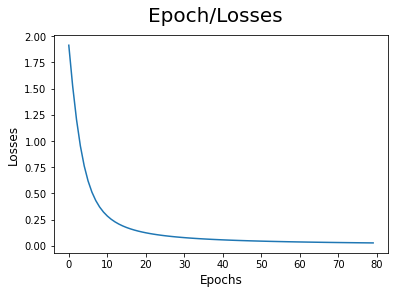

In [11]:
# Analyze 
# Plot loss/epoch

ix = np.arange(0,80)

fig = plt.figure()
fig.suptitle('Epoch/Losses', fontsize=20)
plt.plot(ix,[epoch_losses[i][0] for i in ix])
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Losses', fontsize=12)

In [12]:
# Predict function

def predict(words):
    context_idxs = np.array([word_to_ix[w] for w in words])
    preds = forward(context_idxs, theta)
    word = ix_to_word[np.argmax(preds[-1])]
    
    return word
# (['we', 'are', 'to', 'study'], 'about')
predict(['we', 'are', 'to', 'study'])

'about'

In [13]:
# Accuracy

def accuracy():
    wrong = 0

    for context, target in data:
        if(predict(context) != target):
            wrong += 1
            
    return (1 - (wrong / len(data)))


accuracy()

1.0